Using the old model prior to meeting to verify the recreation of the results.

In [14]:
import sys
sys.path.append("..")
import importlib
import numpy as np
import matplotlib.pyplot as plt
import qutip

import system.old_theoretical as system
importlib.reload(system)
import utils.solver as solver
importlib.reload(solver)
import pulse.tukey as pulse_gen
importlib.reload(pulse_gen)
import utils.expectation_values as expect
importlib.reload(expect)

pass

5.655367343305729


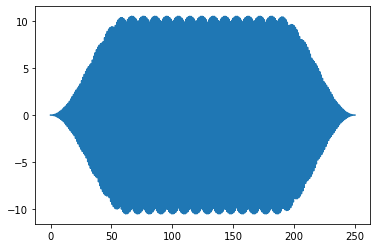

In [15]:
offset = 0.1
tlist = np.linspace(0, 250, 2000)
print(system.first_energy_spacing/3 - offset)
pulse_gen.setup(amplitude=10.5, drive_frequency= system.first_energy_spacing/3 - offset, ramp_coef=0.5, tlist=tlist)
plt.plot(tlist, pulse_gen.get_pulse(tlist))

In [16]:
tlist = np.linspace(0, 1000, 1000*10)
solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=True)

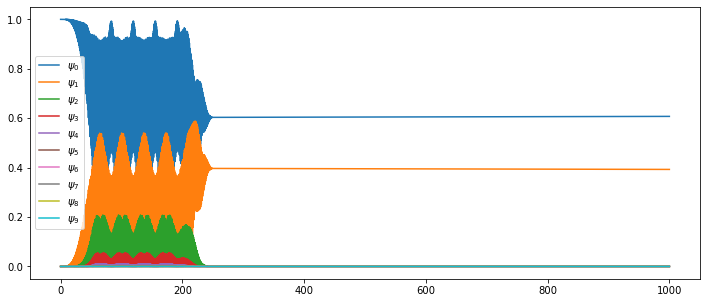

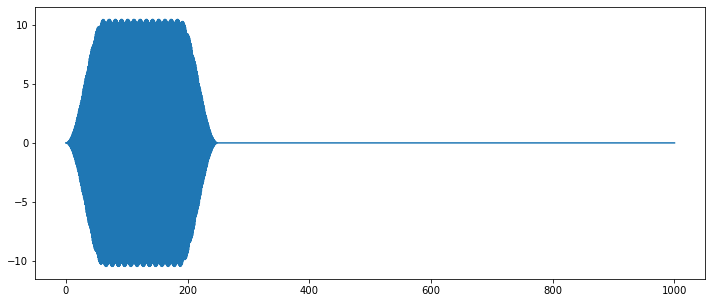

In [17]:
expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(0, len(expectation_values)):
    ax.plot(tlist, expectation_values[i], label="$\psi_{%i}$" % i)
plt.legend()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(tlist, pulse_gen.get_pulse(tlist))

In [136]:
expectation_values[1][-1]

0.013823563833130381

In [156]:
all_results = []
amp = 5.5
for off in np.linspace(0.05, 0.1, 50):
    print(off)
    for dur in np.linspace(1, 300, 30):
        tlist = np.linspace(0, dur, int(dur*10))
        pulse_gen.setup(amplitude=amp, drive_frequency= system.first_energy_spacing/3 - off, ramp_coef=0.5, tlist=tlist)
        solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=False)
        expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
        all_results.append({
            "fidelity": expectation_values[1][-1],
            "offset": off,
            "frequency":  system.first_energy_spacing/3 - off,
            "duration": dur,
            "amplitude": amp
        })

0.05
0.05102040816326531
0.05204081632653061
0.05306122448979592
0.05408163265306123
0.05510204081632653
0.056122448979591844
0.05714285714285715
0.05816326530612245
0.05918367346938776
0.06020408163265306
0.06122448979591837
0.06224489795918368
0.06326530612244899
0.0642857142857143
0.0653061224489796
0.0663265306122449
0.0673469387755102
0.06836734693877551
0.06938775510204082
0.07040816326530613
0.07142857142857142
0.07244897959183674
0.07346938775510205
0.07448979591836735
0.07551020408163266
0.07653061224489796
0.07755102040816328
0.07857142857142857
0.07959183673469389
0.08061224489795919
0.0816326530612245
0.0826530612244898
0.0836734693877551
0.08469387755102041
0.08571428571428572
0.08673469387755103
0.08775510204081632
0.08877551020408164
0.08979591836734695
0.09081632653061225
0.09183673469387756
0.09285714285714286
0.09387755102040818
0.09489795918367347
0.09591836734693879
0.09693877551020409
0.0979591836734694
0.0989795918367347
0.1


In [18]:
# %matplotlib widget

amps = []
offs = []
durs = []
fids = []
for result in all_results:
    amps.append(result["amplitude"])
    offs.append(result["offset"])
    durs.append(result["duration"])
    fids.append(result["fidelity"])

fig, axs = plt.subplots(figsize=(12, 4))
fig.suptitle("Fidelity Landscape at $V_0$ = %f " % amps[-1], fontsize=18)
axs.set_xlabel("Offset")
axs.set_ylabel("Duration (ns)")
surf = axs.scatter(offs, np.array(durs) / 10, c=fids, cmap=None, marker="s", s=40)
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel("fidelity", rotation=270)
cbar.ax.get_yaxis().labelpad = 15
# axs.pcolormesh(offs, durs, fids)

NameError: name 'all_results' is not defined